<p><center><font color='red' size = '6'><b>MAESTRÍA MACC</b></font></center></p>

<p><center><font color='blue' size = '5'>Proyecto Final - Hector Leandro Rojas Serrano</font></center></p>

<p><center><font color='magenta' size = '4'>Universidad del Rosario</font></center></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition, datasets
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

<p><center><font color='blue' size = '5'>Proyecto Final - índice Global de Felicidad</font></center></p>

**Objetivo**

Determinar los principales factores que contribuyen a la felicidad global.


Para determinar el país más feliz del mundo, los investigadores analizaron datos completos de encuestas de Gallup de 149 países durante los últimos tres años, monitoreando específicamente el desempeño en seis categorías particulares: producto interno bruto per cápita, apoyo social, esperanza de vida saludable, libertad para tomar sus propias decisiones de vida. , generosidad de la población en general y percepciones de los niveles de corrupción interna y externa.(World Happiness Report 2022).

Para este proyecto como propuesta vamos a incluir 3 nuevas variables de desarrollo mundial y elementod del Indice de Desarrollo Humano y evaluaremos su efecto en el Indice Global de Felicidad, esta nueva propuesta tratara de aumentar y explicar de una mejor forma el comportamiento de dicho indice.


Triandis(2010) define factores que influyen en el bienestar social o felicidad ya que estan altamente relacionados, entre ellos tenemos la salud, las libertades politicas, eficiencia de las instituciones publicas, el GNI, entre otros, de forma negativa podemos mencionar, los conflictos internacionales, gobiernos no democraticos, desastres naturales, desempleo, deficiencias en salud.

**Variables- Generalidades:**

Datasets
Para construir este modelo utilizamos 3 diferentes fuentes de información, dentro de ellas tenemos:

1.	**Happiness score**: es la variable que pretendemos explicar por medio de modelos de regresión.extraido de : https://happiness-report.s3.amazonaws.com/2022/Appendix_2_Data_for_Figure_2.1.xls
2.	**Unemployment, total (% of total labor force)** se obtuvo de https://databank.worldbank.org/source/world-development-indicators# Datos para 2021
3.	**Political stability and absence of violence** se obtuvo de: https://databank.worldbank.org/source/worldwide-governance-indicators# datos para 2021, este indicador mide las percepciones de la probabilidad de que el gobierno sea desestabilizado o derrocado por medios inconstitucionales o violentos, incluida la violencia y el terrorismo por motivos políticos.
4.	**Mean years of schooling**: data extraída del índice de desarrollo humano Human Development Report 2021-22 https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Statistical_Annex_HDI_Table.xlsx número promedio de años de educación recibidos por personas de 25 años o más, convertidos a partir de los niveles de educación alcanzados utilizando las duraciones oficiales de cada nivel.
5. **Gross national income (GNI) per capita**: data extraída del índice de desarrollo humano Human Development Report 2021-22 https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Statistical_Annex_HDI_Table.xlsx
6. **Control of corruption**: se obtuvo de https://databank.worldbank.org/source/worldwide-governance-indicators# datos para 2021.


**Construcción del dataset**
Se realizó una combinación de los datos mencionados en la sección anterior para crear un dataset para los países analizados y poder explicar y entender el comportamiento del índice global de felicidad. Las secciones son:
1.	Datos del World Happiness Report 2022.(variable de interes)
2.	Indicadores del banco Mundial (Tasa de desempleo, control de corrupción, expectativa de vida al nacer, percepción de estabilidad política y ausencia de violencia).
3.	Años promedio de estudio y Ingreso nacional bruto (INB) per cápita del índice de desarrollo humano 2021-2022.


<p><left><font color='blue' size = '4'>Variables - Descripción:</font></left></p>

1. **Gross national income (GNI) per capita**: Ingreso agregado de una economía generada por su producción y su propiedad de factores de producción, menos los ingresos pagados por el uso de factores de producción propiedad del resto del mundo, convertidos a dólares internacionales utilizando tasas de PPA, dividido por mitad de año población.
2. **Life expectancy at birth**: Número de años que tiene un recién nacido podría esperar vivir si los patrones prevalecientes de las tasas de mortalidad específicas por edad en el momento del nacimiento se mantuvieran iguales durante toda la vida del infante.
3. **Control of Corruption**: El Control de la Corrupción capta las percepciones de la medida en que el poder público se ejerce para beneficio privado, incluidas formas de corrupción menores y mayores, así como la "captura" del Estado por parte de élites e intereses privados. La estimación da la puntuación del país en el indicador agregado, en unidades de una distribución normal estándar, es decir, que van desde aproximadamente -2,5 a 2,5.
4. **Political Stability and Absence of Violence/Terrorism**: mide las percepciones de la probabilidad de inestabilidad política y/o violencia políticamente motivada, incluido el terrorismo. La estimación da la puntuación del país en el indicador agregado, en unidades de una distribución normal estándar, es decir, que van desde aproximadamente -2,5 a 2,5.
5. **Unemployment, total (% of total labor force)**: Es la tasa de desempleo de la prooporción de la fuerza laboral que no tiene trabajo pero que está disponible y buscando empleo.
6. **Mean years of schooling**: Promedio de años de educación recibidos por personas de 25 años o más, convertidos a partir de los niveles de educación alcanzados utilizando las duraciones oficiales de cada nivel.


**Revisando el dataset y sus columnas**

In [2]:
data = pd.read_csv('Database.csv')
data.head()

,RANK,Country,Happiness,GNI,Lifeexpectancy,ControlofCorruption,PoliticalStability,Unemployment,Meanyearsofschooling
0,1,Finland,7.821,49452.16672,82.0381,2.270077,0.981908,7.525,12.87362
1,2,Denmark,7.636,60364.78595,81.3753,2.366175,0.949907,4.798,12.96049
2,3,Iceland,7.557,55782.04981,82.6782,1.790596,1.373475,5.401,13.76717
3,4,Switzerland,7.512,66933.00454,83.9872,1.989697,1.131445,5.321,13.85966
4,5,Netherlands,7.415,55979.41100,81.6873,2.035642,0.915173,4.010,12.58163


<p><center><font color='blue' size = '4'>Análisis Exploratorio de los datos</font></center></p>

**Información general de las variables del modelo:**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RANK                  143 non-null    int64  
 1   Country               143 non-null    object 
 2   Happiness             143 non-null    float64
 3   GNI                   143 non-null    float64
 4   Lifeexpectancy        143 non-null    float64
 5   ControlofCorruption   143 non-null    float64
 6   PoliticalStability    143 non-null    float64
 7   Unemployment          143 non-null    float64
 8   Meanyearsofschooling  143 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 10.2+ KB


**Numero de variables vacias:**

In [4]:
data.isnull().sum().replace(0,np.nan).dropna()

Series([], dtype: float64)

In [5]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RANK                  143 non-null    int64  
 1   Country               143 non-null    object 
 2   Happiness             143 non-null    float64
 3   GNI                   143 non-null    float64
 4   Lifeexpectancy        143 non-null    float64
 5   ControlofCorruption   143 non-null    float64
 6   PoliticalStability    143 non-null    float64
 7   Unemployment          143 non-null    float64
 8   Meanyearsofschooling  143 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 10.2+ KB


In [6]:
data_variables=['GNI',
   'Lifeexpectancy', 'ControlofCorruption',
   'PoliticalStability', 'Unemployment',
   'Meanyearsofschooling']

In [7]:
data_allvariables=['Happiness','GNI',
   'Lifeexpectancy', 'ControlofCorruption',
   'PoliticalStability', 'Unemployment',
   'Meanyearsofschooling']

**Matriz de correlacion:**

<AxesSubplot:>

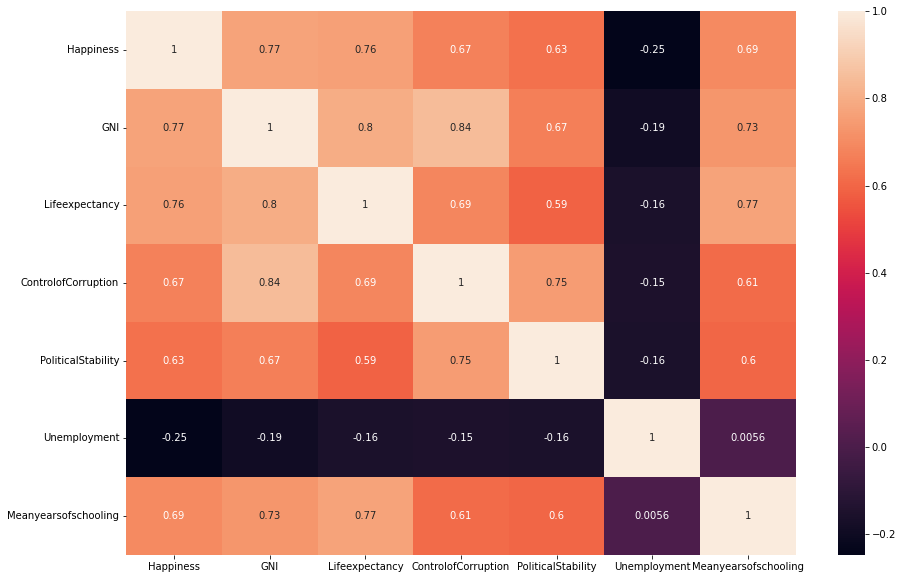

In [8]:
dataCorr = data.drop(['RANK', 'Country'], axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(dataCorr.corr(),annot=True)

En la matriz de correlación se puede observar la relación negativa que existe entre la tasa de desempleo y el índice de felicidad, para las otras variables la relación es positiva o directa.

**Grafico de boxplot:**

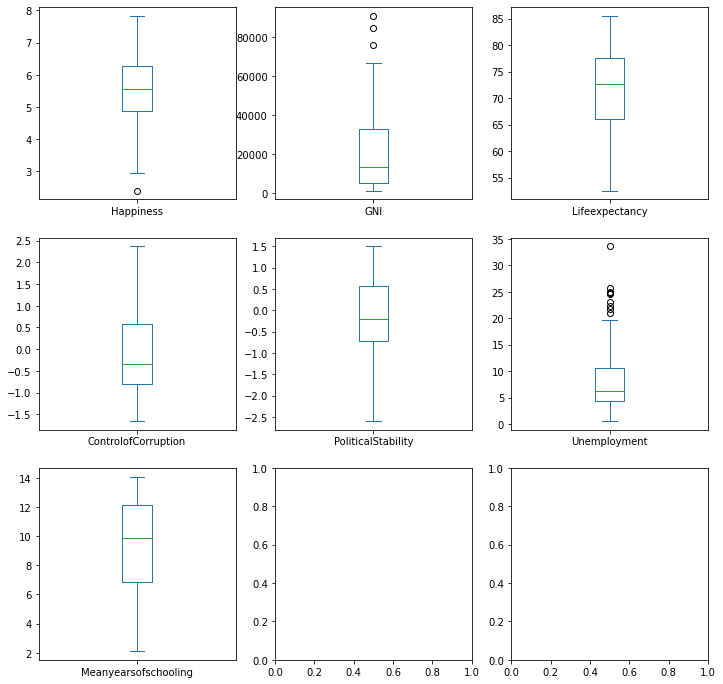

In [9]:
fig,ax = plt.subplots(3,3,figsize=(12,12))
row = col = 0
for n,i in enumerate(data_allvariables):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    data[i].plot(kind="box",ax=ax[row,col])
    col += 1

De los diagramas de caja anteriores podemos concluir que hay valores atípicos en la variable de la tasa de desempleo y el ingreso bruto per cápita.

**Histogramas:**

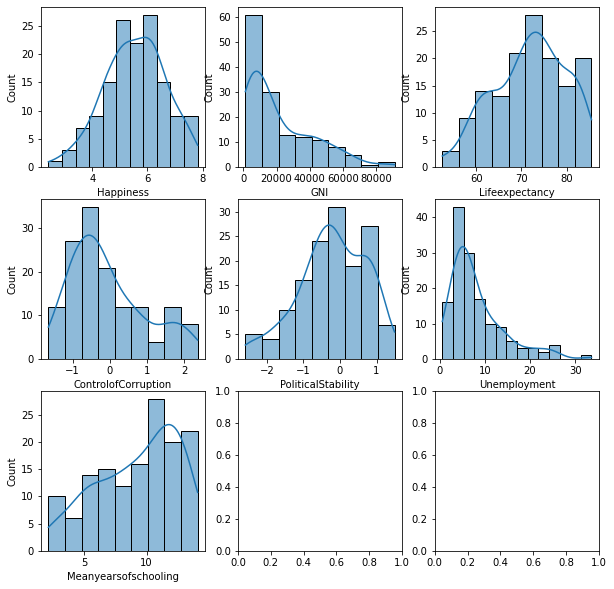

In [10]:
fig,ax = plt.subplots(3,3,figsize=(10,10))
row = col = 0
for n,i in enumerate(data_allvariables):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.histplot(data[i],kde=True,ax=ax[row,col])
    col += 1

De los histogramas podemos comentar que en su mayoría están sesgados hacia la derecha o hacia la izquierda, en cuanto a la tasa de desempleo su sesgo es mas pronunciado a la izquierda y presenta pocos datos por encima del 20%. esta misma tendencia la tiene el ingreso bruto per cápita, respecto a la variable de interés o índice global de necesidad podemos afirmar que sigue una distribución normal con un pequeño sesgo a la derecha.

**Pairplot:**

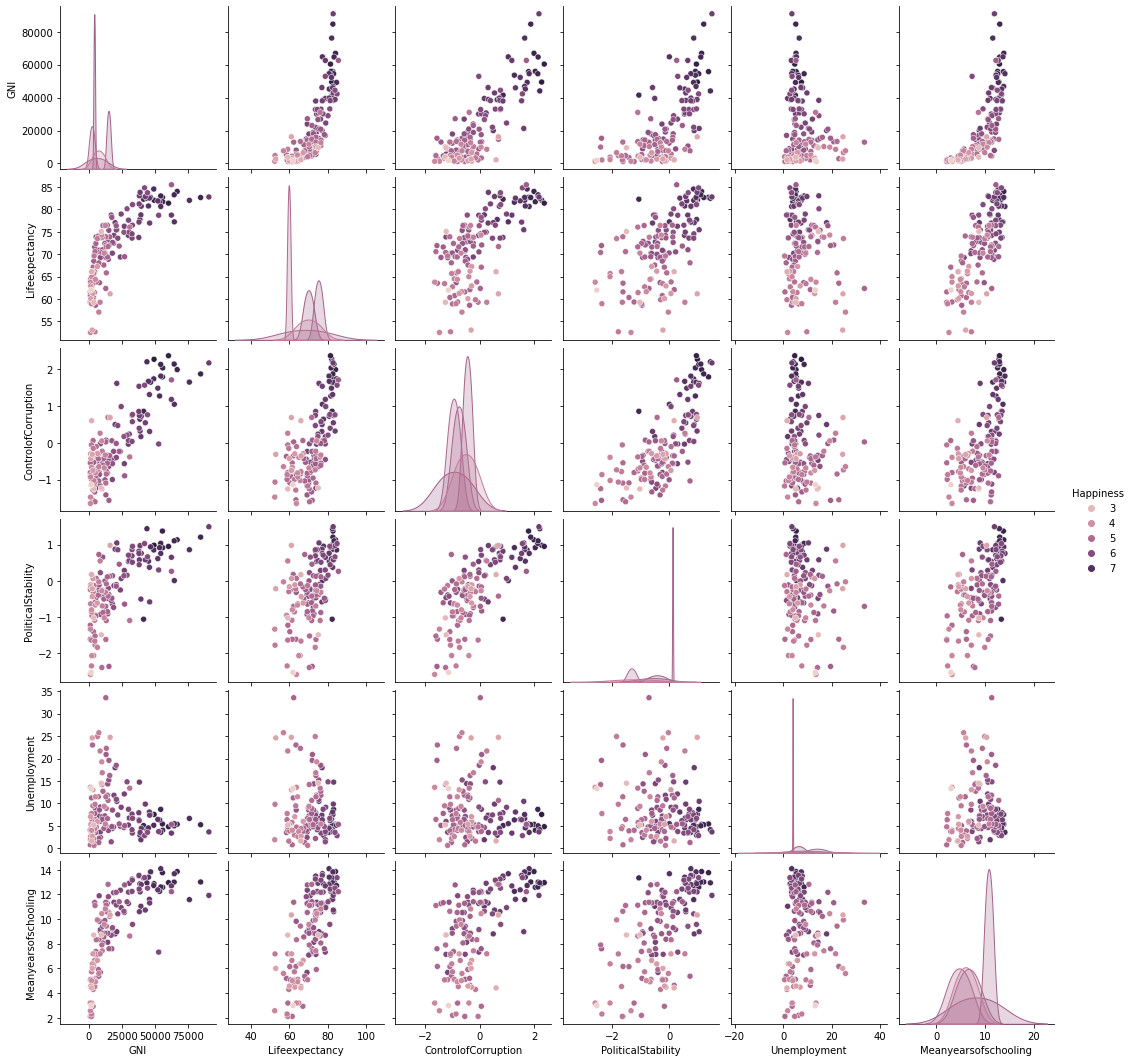

In [11]:
sns.pairplot(dataCorr, hue = "Happiness")

Siguiendo la teoría y varios autores podemos evidenciar en este gráfico bivariado de dispersión que para la variable desempleo se observa una relación contraria con el GNI donde cuando este último aumenta la felicidad aumenta pero el desempleo tiende a la baja (5 grafica de la primera columna de arriba hacia abajo), existe por tanto una relación con los niveles de felicidad y el nivel de empleo con los ingresos per cápita.

<p><center><font color='blue' size = '4'>Modelo MCO</font></center></p>

In [12]:
X = data.drop(columns = ['Happiness','RANK','Country'],axis=1)
y = data['Happiness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg
lin_reg_train = LinearRegression()
lin_reg_train.fit(X_train, y_train)
lin_reg_train



LinearRegression()

**Coeficientes de MCO:**

In [14]:
df_coeficientes_lin_reg = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef Opt': lin_reg.coef_.flatten(),'coef Opt Train': lin_reg_train.coef_.flatten()})
df_coeficientes_lin_reg

,predictor,coef Opt,coef Opt Train
0,GNI,0.000017,0.000015
1,Lifeexpectancy,0.038346,0.040758
2,ControlofCorruption,-0.022178,-0.035837
3,PoliticalStability,0.167778,0.208002
4,Unemployment,-0.022996,-0.027458
5,Meanyearsofschooling,0.060292,0.071585


**R2 y RMSE resumidos:**

In [15]:
y_mco_hat=lin_reg.predict(X)
y_mco_hat_test = lin_reg_train.predict(X_test)
y_mco_hat_train = lin_reg_train.predict(X_train)

In [16]:
rmse_mco = mean_squared_error(
                y_true  = y,
                y_pred  = y_mco_hat,
                squared = False)
rmse_mco_test = mean_squared_error(
                y_true  = y_test,
                y_pred  = y_mco_hat_test,
                squared = False)
rmse_mco_train = mean_squared_error(
                y_true  = y_train,
                y_pred  = y_mco_hat_train,
                squared = False)

In [17]:
print("MCO Score o R2:", lin_reg.score(X,y))
print("MCO Train Score o R2:", lin_reg_train.score(X_train,y_train))
print("MCO Test Score o R2:", lin_reg_train.score(X_test,y_test))
print(f"El error (rmse) para MCO es: {rmse_mco}")
print(f"El error (rmse) en Training para MCO es: {rmse_mco_train}")
print(f"El error (rmse) en Testing para MCO es: {rmse_mco_test}")

MCO Score o R2: 0.6837315084596044
MCO Train Score o R2: 0.670690951806701
MCO Test Score o R2: 0.7314263129519094
El error (rmse) para MCO es: 0.6123037409240174
El error (rmse) en Training para MCO es: 0.6385951224981687
El error (rmse) en Testing para MCO es: 0.5081308534410823


**Predicciones:**

In [18]:
X_test[:5]

,GNI,Lifeexpectancy,ControlofCorruption,PoliticalStability,Unemployment,Meanyearsofschooling
117,4623.705430,66.0979,-0.785677,-1.666779,4.352,4.536330
19,45937.052730,82.4988,1.310407,0.371734,8.063,11.610060
82,15335.712000,71.9112,-1.567405,-2.366910,19.584,7.599985
97,1198.073924,59.3247,-0.811556,-1.228189,3.982,3.197642
56,44500.931870,83.6978,0.759860,0.662571,3.532,12.512930


In [19]:
y_pred_linear = lin_reg.predict(np.array([[8295.66,70.74,-0.53,-0.21,5.94,7.15]]))
y_pred_linear

C:\Users\hlrs2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.20640032])

<p><center><font color='blue' size = '4'>Modelo Ridge</font></center></p>

**Estandarización de los datos:**

Debido a su escalamiento vamos a estandarizar solamente las variables **'Gross national income (GNI) per capita',
   'Life expectancy at birth', 'Unemployment, total (% of total labor force)'y
   'Mean years of schooling'**

In [20]:
data_ = data.copy()


data_copy = data_
data_copy.head()

,RANK,Country,Happiness,GNI,Lifeexpectancy,ControlofCorruption,PoliticalStability,Unemployment,Meanyearsofschooling
0,1,Finland,7.821,49452.16672,82.0381,2.270077,0.981908,7.525,12.87362
1,2,Denmark,7.636,60364.78595,81.3753,2.366175,0.949907,4.798,12.96049
2,3,Iceland,7.557,55782.04981,82.6782,1.790596,1.373475,5.401,13.76717
3,4,Switzerland,7.512,66933.00454,83.9872,1.989697,1.131445,5.321,13.85966
4,5,Netherlands,7.415,55979.41100,81.6873,2.035642,0.915173,4.010,12.58163


In [21]:
data_copy[['Happiness','GNI',
   'Lifeexpectancy', 'Unemployment',
   'Meanyearsofschooling']] = StandardScaler().fit_transform(data_copy[['Happiness','GNI',
   'Lifeexpectancy', 'Unemployment',
   'Meanyearsofschooling']])
data_standard=data_copy
data_standard

,RANK,Country,Happiness,GNI,Lifeexpectancy,ControlofCorruption,PoliticalStability,Unemployment,Meanyearsofschooling
0,1,Finland,2.093932,1.390271,1.285580,2.270077,0.981908,-0.113561,1.115317
1,2,Denmark,1.924017,1.931560,1.201369,2.366175,0.949907,-0.573190,1.142076
2,3,Iceland,1.851458,1.704246,1.366908,1.790596,1.373475,-0.471556,1.390558
3,4,Switzerland,1.810127,2.257357,1.533222,1.989697,1.131445,-0.485040,1.419048
4,5,Netherlands,1.721037,1.714036,1.241010,2.035642,0.915173,-0.706006,1.025375
...,...,...,...,...,...,...,...,...,...
138,142,Botswana*,-1.901376,-0.259189,-1.369498,0.685204,0.978378,2.784951,0.334885
139,143,Rwanda*,-2.087824,-0.953049,-0.742955,0.599220,0.170439,-1.111025,-1.487026
140,144,Zimbabwe,-2.338564,-0.873681,-1.609351,-1.257897,-1.026783,-0.509816,-0.166925
141,145,Lebanon,-2.375303,-0.590158,0.397357,-1.229704,-1.493481,1.060036,-0.164545


In [22]:
X_Standard = data_standard.drop(columns = ['Happiness','RANK','Country'],axis=1)
y_Standard = data_standard['Happiness']
X_train_Standard, X_test_Standard, y_train_Standard, y_test_Standard = train_test_split(X_Standard, y_Standard, test_size=0.20, random_state=40)

In [23]:
n_alfas = 1000

In [24]:
#Ridge para Training
ridge_reg_train = RidgeCV(alphas          = np.logspace(10, -2, n_alfas), # factor de castigo
            fit_intercept   = True, # que tenga intercpeto
            store_cv_values = True)
ridge_reg_train.fit(X_train_Standard, y_train_Standard)

RidgeCV(alphas=array([1.00000000e+10, 9.72720319e+09, 9.46184819e+09, 9.20373200e+09,
       8.95265713e+09, 8.70843150e+09, 8.47086827e+09, 8.23978568e+09,
       8.01500696e+09, 7.79636013e+09, 7.58367791e+09, 7.37679760e+09,
       7.17556092e+09, 6.97981391e+09, 6.78940681e+09, 6.60419396e+09,
       6.42403366e+09, 6.24878807e+09, 6.07832313e+09, 5.91250841e+09,
       5.75121707e+09, 5.59432571e+0...
       1.88919278e-02, 1.83765620e-02, 1.78752553e-02, 1.73876240e-02,
       1.69132952e-02, 1.64519059e-02, 1.60031031e-02, 1.55665436e-02,
       1.51418933e-02, 1.47288272e-02, 1.43270295e-02, 1.39361927e-02,
       1.35560179e-02, 1.31862140e-02, 1.28264983e-02, 1.24765955e-02,
       1.21362380e-02, 1.18051653e-02, 1.14831241e-02, 1.11698682e-02,
       1.08651577e-02, 1.05687597e-02, 1.02804473e-02, 1.00000000e-02]),
        store_cv_values=True)

In [26]:

y_hat_test_ridge = ridge_reg_train.predict(X_test_Standard)
y__hat_train_ridge = ridge_reg_train.predict(X_train_Standard)

In [27]:
rmse_ridge_test = mean_squared_error(
                y_true  = y_test_Standard,
                y_pred  = y_hat_test_ridge,
                squared = False)
rmse_ridge_train = mean_squared_error(
                y_true  = y_train_Standard,
                y_pred  = y__hat_train_ridge,
                squared = False)

In [28]:

print("Ridge Training Score", ridge_reg_train.score(X_train_Standard,y_train_Standard))
print("Ridge Test Score", ridge_reg_train.score(X_test_Standard,y_test_Standard))

print(f"El error (rmse) en Training para Ridge es: {rmse_ridge_train}")
print(f"El error (rmse) en Testing para Ridge es: {rmse_ridge_test}")

Ridge Training Score 0.6626343581659409
Ridge Test Score 0.7517042539923952
El error (rmse) en Training para Ridge es: 0.5847220581089185
El error (rmse) en Testing para Ridge es: 0.48270084240838995


**Coeficientes con el modelo Ridge**

In [30]:
df_coeficientes_Ridge = pd.DataFrame(
                        {'coef Opt Train': ridge_reg_train.coef_.flatten()})
df_coeficientes_Ridge

,coef Opt Train
0,0.247249
1,0.263066
2,0.077834
3,0.118592
4,-0.113527
5,0.183961


In [53]:
X_test_Standard[:5]

,GNI,Lifeexpectancy,ControlofCorruption,PoliticalStability,Unemployment,Meanyearsofschooling
129,-0.810913,-0.960040,-0.821054,-0.670255,0.550179,-1.335009
84,-0.803863,-1.692546,-0.371893,-0.952860,-0.797358,-1.248658
75,-0.416805,-0.337373,-1.419503,-0.319025,-0.525491,0.618701
109,-0.957606,-1.607255,-0.059376,-1.638742,-0.579932,-2.198679
48,0.563744,0.331657,0.035608,0.861372,-0.688140,0.923097


In [54]:
y_pred_ridge = ridge_reg_train.predict(np.array([[0.563744,0.331657,0.035608,0.861372,-0.688140,0.923097]]))
y_pred_ridge

C:\Users\hlrs2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


array([0.579644])

<p><center><font color='blue' size = '4'>Modelo Lasso</font></center></p>

In [32]:
data_standard

,RANK,Country,Happiness,GNI,Lifeexpectancy,ControlofCorruption,PoliticalStability,Unemployment,Meanyearsofschooling
0,1,Finland,2.093932,1.390271,1.285580,2.270077,0.981908,-0.113561,1.115317
1,2,Denmark,1.924017,1.931560,1.201369,2.366175,0.949907,-0.573190,1.142076
2,3,Iceland,1.851458,1.704246,1.366908,1.790596,1.373475,-0.471556,1.390558
3,4,Switzerland,1.810127,2.257357,1.533222,1.989697,1.131445,-0.485040,1.419048
4,5,Netherlands,1.721037,1.714036,1.241010,2.035642,0.915173,-0.706006,1.025375
...,...,...,...,...,...,...,...,...,...
138,142,Botswana*,-1.901376,-0.259189,-1.369498,0.685204,0.978378,2.784951,0.334885
139,143,Rwanda*,-2.087824,-0.953049,-0.742955,0.599220,0.170439,-1.111025,-1.487026
140,144,Zimbabwe,-2.338564,-0.873681,-1.609351,-1.257897,-1.026783,-0.509816,-0.166925
141,145,Lebanon,-2.375303,-0.590158,0.397357,-1.229704,-1.493481,1.060036,-0.164545


In [33]:
print("No. de Factores de Riesgos:", n_alfas)

No. de Factores de Riesgos: 1000


In [34]:
#Lasso para Training
lasso_reg_train = LassoCV(
            #normalize       = True,
            fit_intercept = True,
            cv              = 5
         )
lasso_reg_train.fit(X_train,y_train)

LassoCV(cv=5)

In [36]:
y__hat_train_lasso = lasso_reg_train.predict(X_train_Standard)
y_hat_test_lasso = lasso_reg_train.predict(X_test_Standard)

In [37]:

rmse_lasso_train = mean_squared_error(
                y_true  = y_train_Standard,
                y_pred  = y__hat_train_lasso,
                squared = False)
rmse_lasso_test = mean_squared_error(
                y_true  = y_test_Standard,
                y_pred  = y_hat_test_lasso,
                squared = False)

In [38]:

print("Lasso Training Score", lasso_reg_train.score(X_train_Standard, y_train_Standard))
print("Lasso Test Score", lasso_reg_train.score(X_test_Standard,y_test_Standard))

print(f"El error (rmse) en Training para Lasso es: {rmse_lasso_train}")
print(f"El error (rmse) en Testing para Lasso es: {rmse_lasso_test}")

Lasso Training Score -21.90362037908093
Lasso Test Score -22.613826779719748
El error (rmse) en Training para Lasso es: 4.817826104759959
El error (rmse) en Testing para Lasso es: 4.707351232925361


**Coeficientes con modelo Lasso**

In [40]:
df_coeficientes_Lasso = pd.DataFrame(
                        {'coef Opt train': lasso_reg_train.coef_.flatten()})
df_coeficientes_Lasso

,coef Opt train
0,0.000039
1,0.000000
2,0.000000
3,0.000000
4,-0.000000
5,0.000000


In [55]:
X_test_Standard[:5]

,GNI,Lifeexpectancy,ControlofCorruption,PoliticalStability,Unemployment,Meanyearsofschooling
129,-0.810913,-0.960040,-0.821054,-0.670255,0.550179,-1.335009
84,-0.803863,-1.692546,-0.371893,-0.952860,-0.797358,-1.248658
75,-0.416805,-0.337373,-1.419503,-0.319025,-0.525491,0.618701
109,-0.957606,-1.607255,-0.059376,-1.638742,-0.579932,-2.198679
48,0.563744,0.331657,0.035608,0.861372,-0.688140,0.923097


In [56]:
y_pred_lasso = lasso_reg_train.predict(np.array([[-0.957606,-1.607255,-0.059376,-1.638742,-0.579932,-2.198679]]))
y_pred_lasso

C:\Users\hlrs2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


array([4.69017615])

El modelo Lasso se concluye que tiene un pobre desempeño por lo tanto no puede predecir o explicar la variable objetivo

<p><center><font color='blue' size = '4'>MCO con estimadores globales</font></center></p>

In [41]:
import statsmodels.api as sm # modelo estadistico
import statsmodels.formula.api as smf # modelo estadistico

In [42]:
model_MCO = sm.OLS(X,y)
results = model_MCO.fit()
?results

In [43]:
mco_regul = smf.ols('Happiness ~ GNI+Lifeexpectancy+ControlofCorruption+PoliticalStability+Unemployment+Meanyearsofschooling', data=data).fit()
mco_regul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     49.00
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.15e-31
Time:                        19:41:19   Log-Likelihood:                -132.76
No. Observations:                 143   AIC:                             279.5
Df Residuals:                     136   BIC:                             300.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.0808      0.775      2.684      0.008       0.548       3.614
GNI                   1.711e-05   6.11e-06      2.799      0.006    5.02e-06    2.92e-05
Lifeexpectancy           0.0383      0.012      3.069      0.003       0.014       0.063
ControlofCorruption     -0.0222      0.112     -0.199      0.843      -0.243       0.198
PoliticalStability       0.1678      0.091      1.843      0.067      -0.012       0.348
Unemployment            -0.0230      0.009     -2.455      0.015      -0.042      -0.004
Meanyearsofschooling     0.0603      0.028      2.140      0.034       0.005       0.116
==============================================================================
Omnibus:                       21.239   Durbin-Watson:                   1.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.162
Skew:                          -0.908   Prob(JB):                     2.08e-06
Kurtosis:                       4.047   Cond. No.                     4.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Prob(Omnibus): Probabilidad de que el residuo del modelo sigue distribución normal. (> 5% implica normalidad)
* Durbin-Watson: Homocedasticidad seria un modelo entre 1-2 evidencia de correlación serial positiva.
* Prob(Jarque-Bera (JB)): Probabilidad de que el residuo del modelo sigue distribución normal a partir del skew y la kurtosis.   (> 5% implica normalidad)

In [44]:
y_hat_mco_reg = mco_regul.predict(X)
y_hat_mco_reg

0      6.790366
1      7.012121
2      7.102268
3      7.305656
4      6.945830
         ...   
138    4.906377
139    4.897427
140    4.679998
141    5.090795
142    3.964238
Length: 143, dtype: float64

In [45]:
rmse_mco_glob_reg = mean_squared_error(
                y_true  = y,
                y_pred  = np.array(y_hat_mco_reg),
                squared = False)

In [46]:
print(f"El error (rmse) en MCO Regularizado es: {rmse_mco_glob_reg}")

El error (rmse) en MCO Regularizado es: 0.6123037409240174


<p><center><font color='blue' size = '4'>Conclusiones</font></center></p>


1.	Por sus resultados, el modelo de regresión que brinda mejores resultados es el modelo de Ridge CV ya que tiene el menor RMSE entre los demás modelos.
2.	En cuanto a la felicidad de los países se observa que en gran parte los factores económicos y de riesgo país influyen positivamente en dicho índice.
3.	Podemos expandir este estudio incluyendo más variables socioeconómicas que nos permitirán mejorar la efectividad de políticas públicas, inversiones, programas sociales, entre otros.


**Bibliografia:**

1. Helliwell, J. F., Layard, R., Sachs, J. D., De Neve, J.-E., Aknin, L. B., & Wang, S. (Eds.). (2022). **World Happiness Report 2022**. New York
2. Banco Mundial, **Indicadores de Desarrollo Mundial**. (2022).
3. Banco Mundial, **Indicadores de Gobernanza Mundial**. (2022).
4. UNDP (United Nations Development Programme). 2022. **Human Development Report 2021-22: Uncertain Times, Unsettled Lives: Shaping our Future in a Transforming World**. New York.
5. Vallejo, C. **Indices de Felicidad y Bienestar Subjetivo: La paradoja del caso Colombiano** 2005. Bogotá.
6. Triandis, Harry C. (2000) **“Culture & Subjective w ell Being”**. Cap 2 